In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_parquet('../../../data_parquet/weather.parquet')
df_copy = df.copy()

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178370 entries, 0 to 178369
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            178370 non-null  int64         
 1   time_hourly   178370 non-null  datetime64[ns]
 2   city_name     178370 non-null  object        
 3   temp          178370 non-null  float64       
 4   temp_min      178370 non-null  float64       
 5   temp_max      178370 non-null  float64       
 6   pressure      178370 non-null  int64         
 7   humidity      178370 non-null  int64         
 8   wind_speed    178370 non-null  float64       
 9   wind_deg      178370 non-null  int64         
 10  rain_1h       178370 non-null  int64         
 11  rain_3h       178370 non-null  int64         
 12  snow_3h       178370 non-null  int64         
 13  clouds_all    178370 non-null  int64         
 14  weather_id    178370 non-null  int64         
 15  weather_main  178

In [4]:
# nulos?
df_copy.isna().sum()

id              0
time_hourly     0
city_name       0
temp            0
temp_min        0
temp_max        0
pressure        0
humidity        0
wind_speed      0
wind_deg        0
rain_1h         0
rain_3h         0
snow_3h         0
clouds_all      0
weather_id      0
weather_main    0
weather_icon    0
dtype: int64

In [5]:
# Duplicados?
df_copy.duplicated().sum()

0

In [4]:
df_copy.drop(['id', 'time_hourly'], axis = 1).describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178370.000000,178370.000000,178370.000000,1.783700e+05,178370.000000,178370.000000,178370.000000,178370.000000,178370.000000,178370.000000,178370.000000,178370.000000
mean,16.471648,15.180995,17.941450,1.069269e+03,68.422280,8.894626,166.592207,0.027763,0.000011,0.004098,25.075960,759.827678
std,8.027391,7.955920,8.612795,5.970067e+03,21.903592,7.545485,116.610970,0.366022,0.004736,0.211860,30.775084,108.738348
min,-10.900000,-10.900000,-10.900000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,10.500000,9.300000,11.500000,1.013000e+03,53.000000,3.600000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,16.000000,15.000000,17.000000,1.018000e+03,72.000000,7.200000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,22.000000,20.600000,24.000000,1.022000e+03,87.000000,14.400000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,42.500000,42.000000,48.000000,1.008371e+06,100.000000,478.800000,360.000000,12.000000,2.000000,21.000000,100.000000,804.000000


**Análisis distribución características**

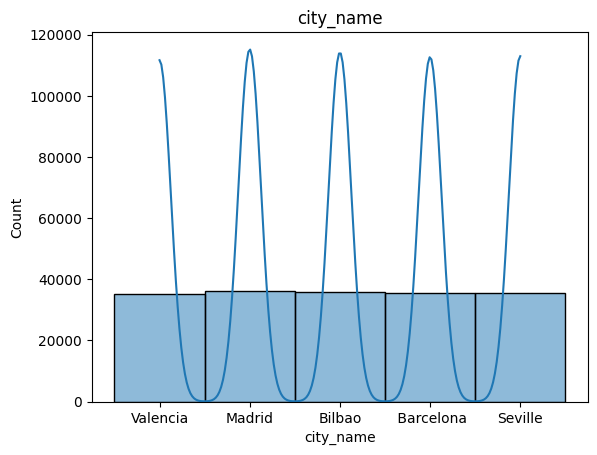

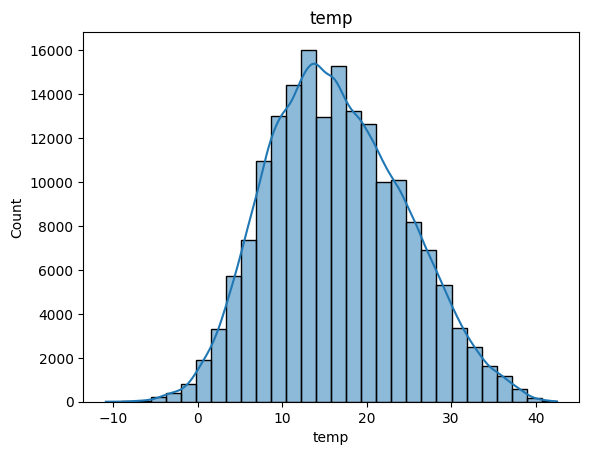

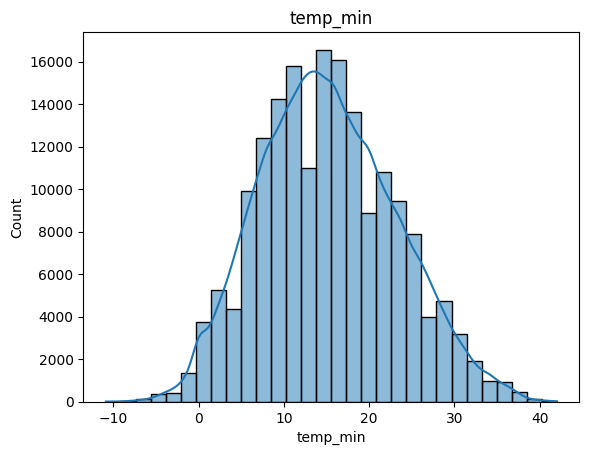

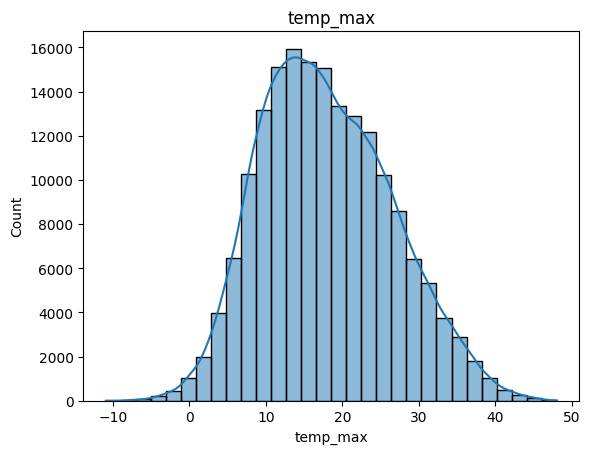

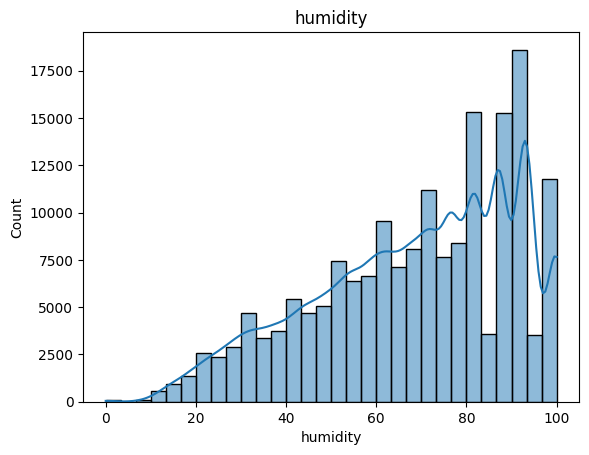

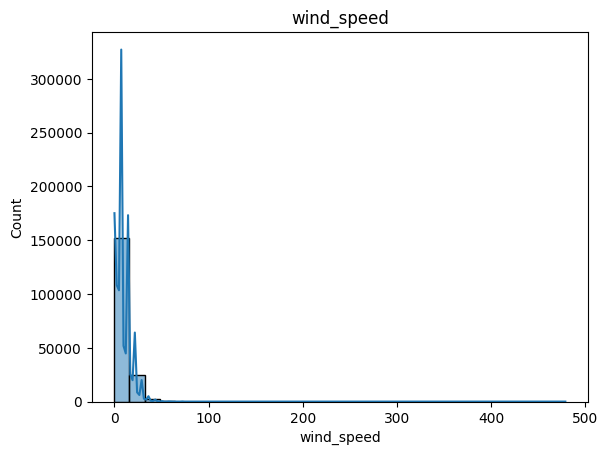

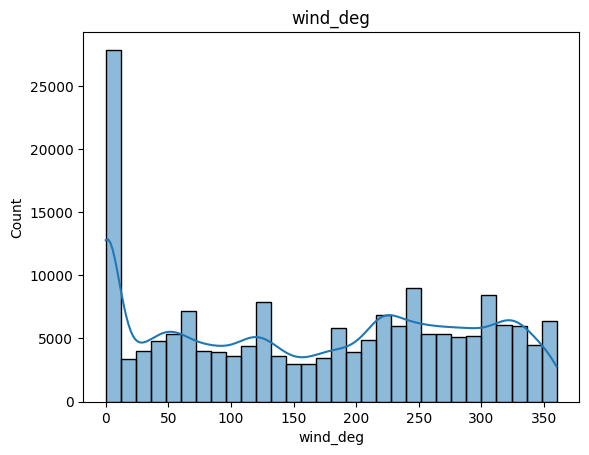

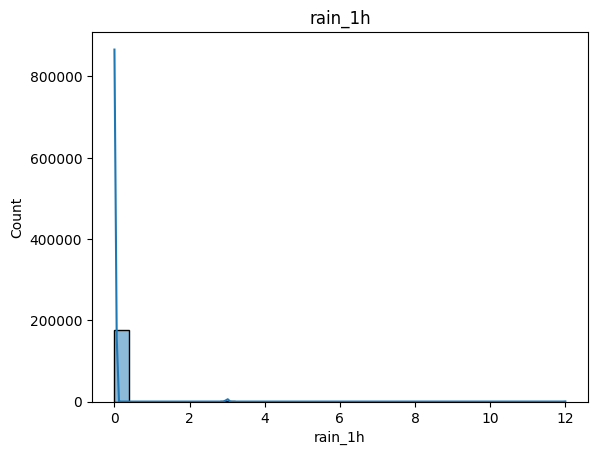

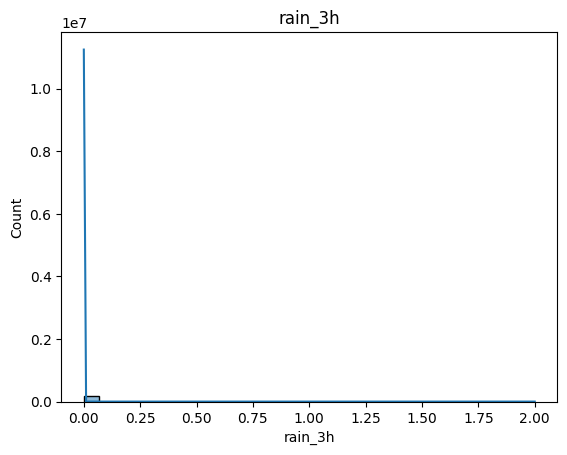

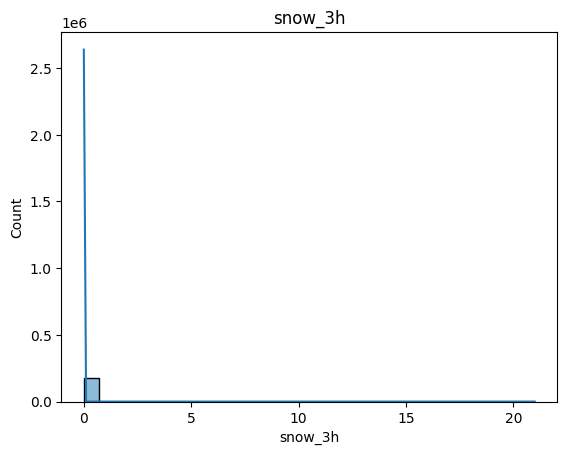

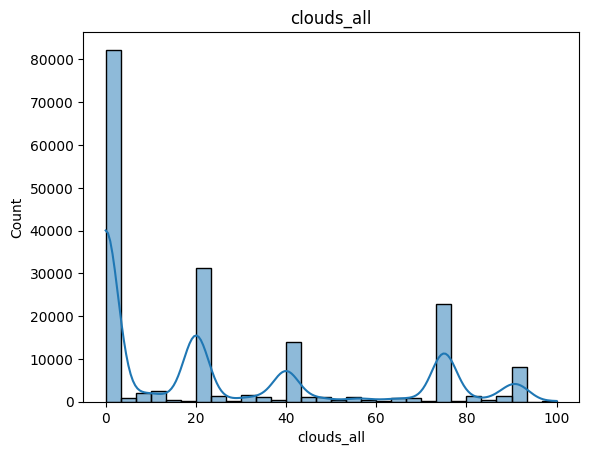

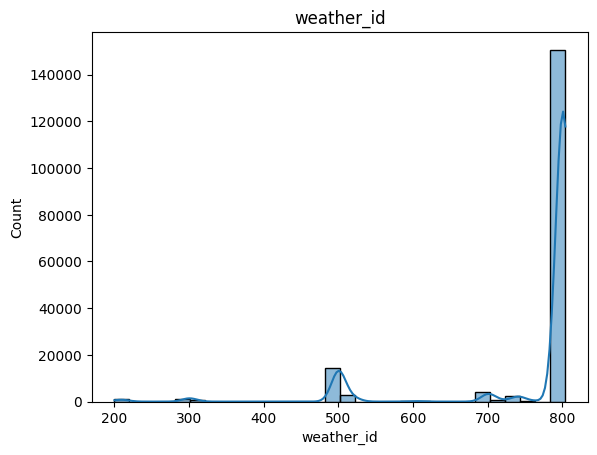

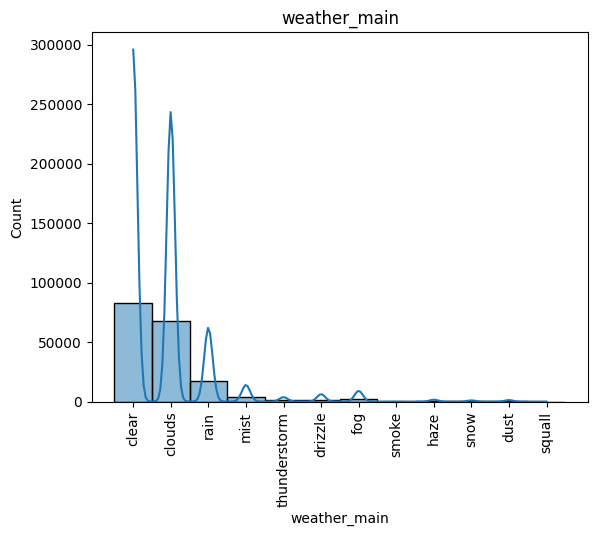

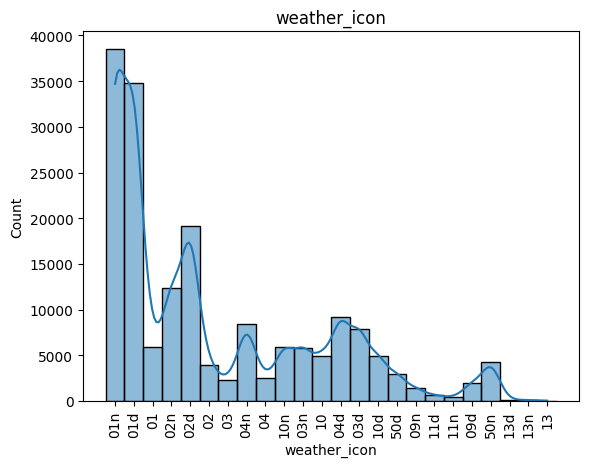

In [3]:
for i in df_copy.drop(['id', 'time_hourly', 'pressure'], axis = 1).columns:
    sns.histplot(data=df_copy, x=i, kde=True, bins=30)
    if i == 'weather_main' or i == 'weather_icon':
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()
    else:
        plt.title(i)
        plt.show()

**Correlaciones**

<Axes: >

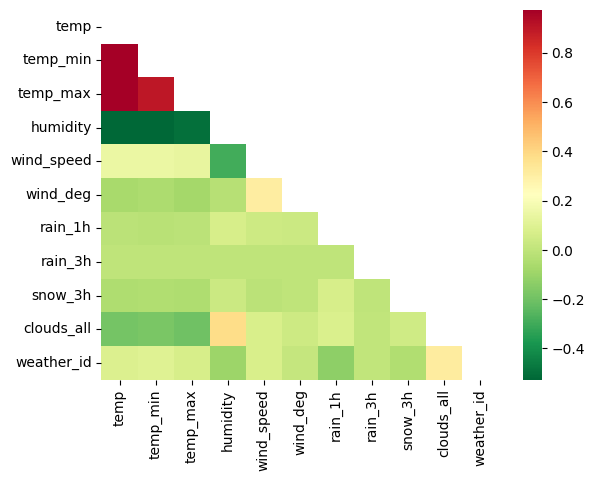

In [8]:
# Correlacion entre características
numeric_features = df_copy.select_dtypes(include='number')
columns = numeric_features.drop(['id', 'pressure'], axis = 1).corr('spearman')
mask = np.triu(np.ones_like(columns, dtype=bool))
sns.heatmap(columns, mask=mask, cmap='RdYlGn_r', annot=False)

Observamos como la esquina superior concentra todas las correlaciones mas altas.

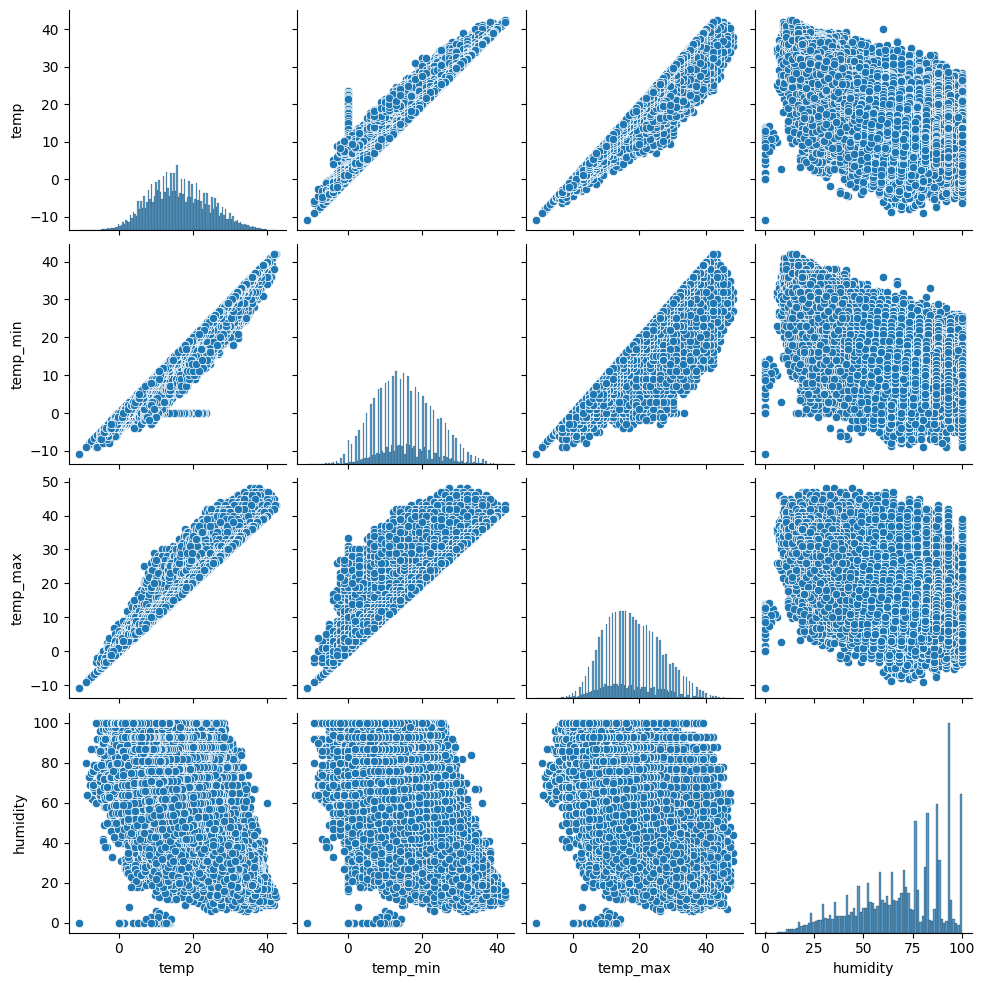

In [10]:
columns_pairplot= ['temp','temp_min','temp_max', 'humidity']
pair_plot = df_copy[columns_pairplot]

sns.pairplot(pair_plot)

Las características referente a temperaturas presentan una relación muy alta.

Revisaremos una vez se realice las primeras inferencias si presentan problemas de multicolinealidad, si es así, reduciremos su dimensionalidad.

**Valores Atípicos**

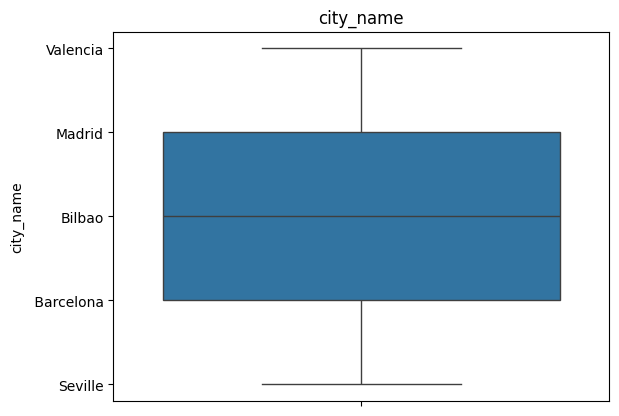

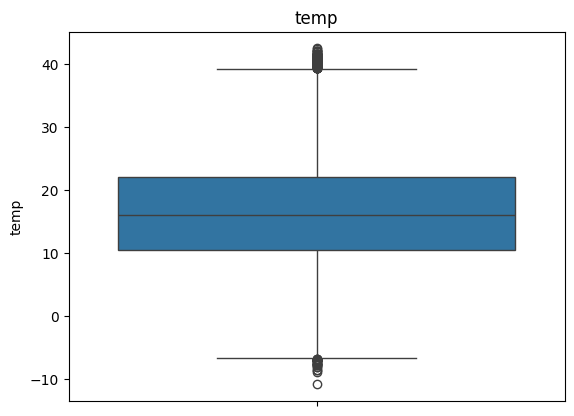

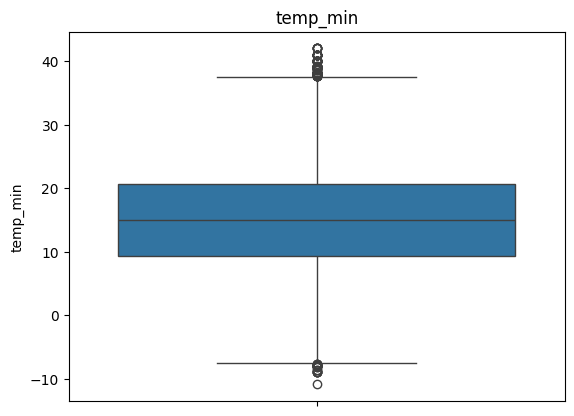

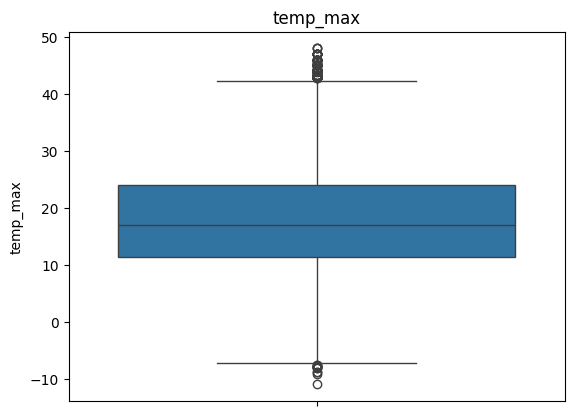

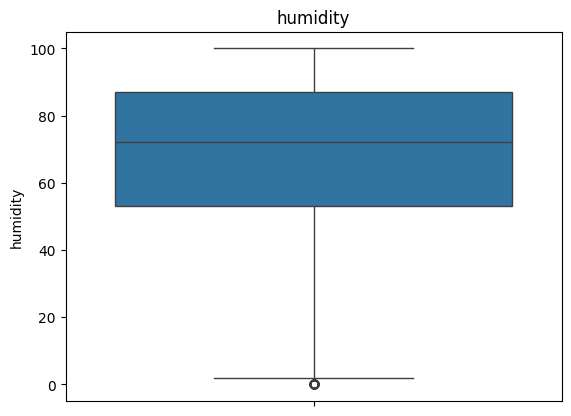

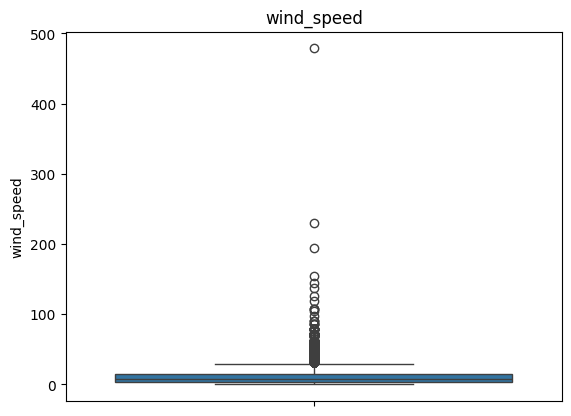

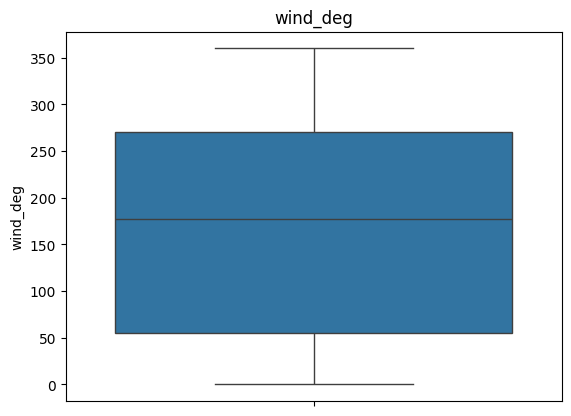

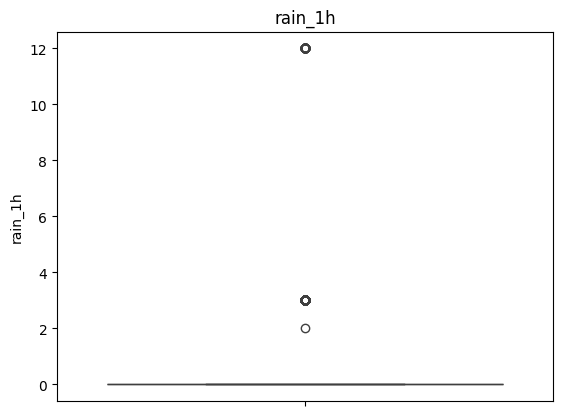

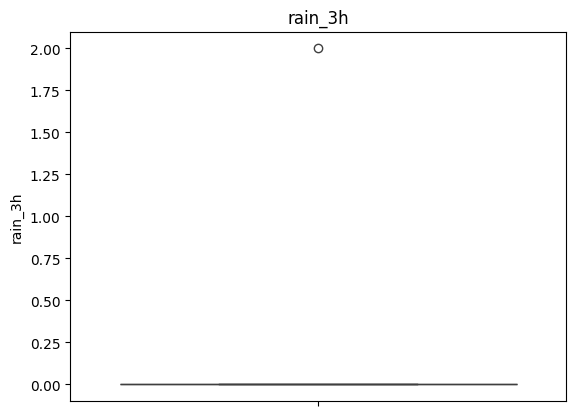

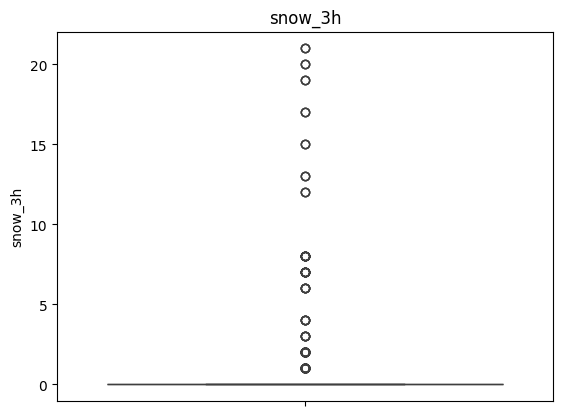

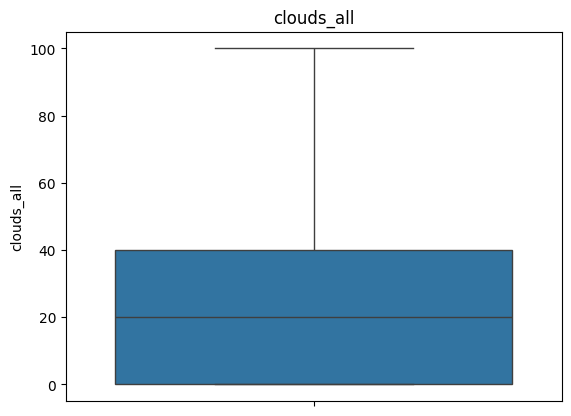

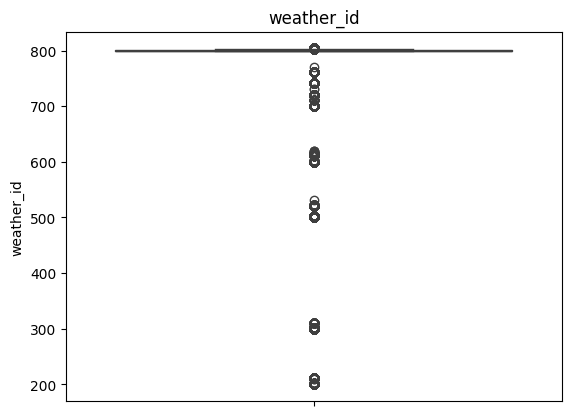

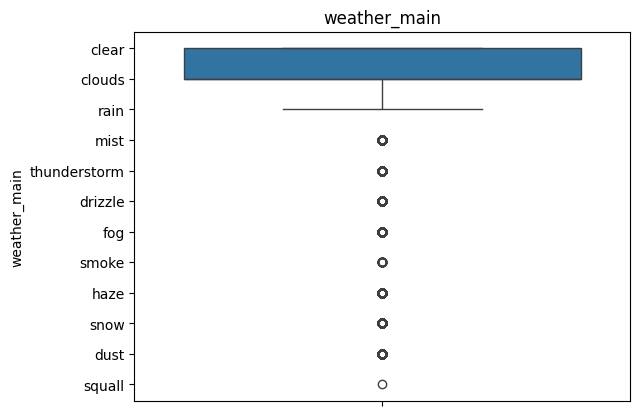

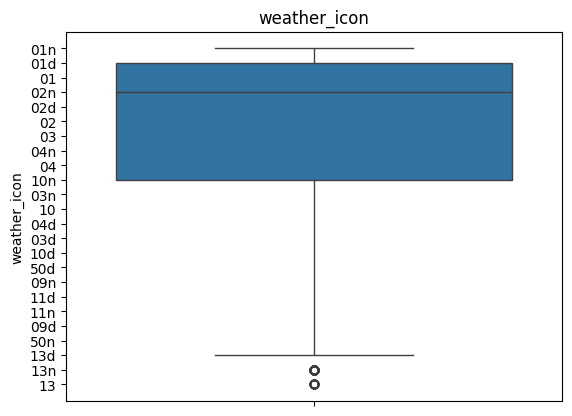

In [3]:
for i in df_copy.drop(['time_hourly','id', 'pressure'], axis = 1).columns:
    sns.boxplot(data=df_copy, y=i)
    plt.title(i)
    plt.show()